In [1]:
import torch
import pandas as pd
df = pd.read_json('/home/userroot/dev/zms/datasets/2024_04_24_index_300_keynotes.jsonl', lines=True)
t = torch.tensor(df['embeddings']).reshape(df.shape[0],1, -1).squeeze()
df_embeddings = pd.DataFrame(t)
df_embeddings.insert(0, 'date', df['date'])
df_embeddings.insert(1, 'code', df['code'])

#获得股票代码对应的唯一值token编码
code_uniq = df_embeddings['code'].unique()

In [12]:
df_embeddings

,date,code,0,1,2,3,4,5,6,7,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,2024-03-13 08:53:00,sz300750,0.002847,-0.020852,0.011475,0.043627,0.000017,0.001207,-0.014042,0.017827,...,0.000001,0.025949,0.032112,0.029283,0.000329,-0.025538,-0.024788,0.001819,0.000854,0.011193
1,2023-11-02 09:25:00,sh600519,0.065992,-0.032219,0.054605,0.095922,-0.004763,-0.007322,0.032939,0.043696,...,0.000002,-0.018666,0.126576,0.006852,-0.037934,0.020231,-0.070892,0.030010,0.070258,0.041193
2,2023-11-02 09:40:00,sh600519,0.082235,-0.035655,0.053861,0.081966,-0.002570,-0.003266,-0.000928,0.029777,...,0.000001,-0.017781,0.087146,0.010635,-0.025860,0.001886,-0.040470,0.010587,0.039643,0.010072
3,2023-10-23 11:40:00,sh600519,0.084007,-0.020835,0.011565,0.093759,0.029698,-0.021751,0.026748,-0.015048,...,0.000001,0.050601,0.067040,0.019823,-0.028254,-0.026978,-0.062607,-0.025891,0.023719,0.033225
4,2023-10-22 08:25:00,sh600519,0.085509,-0.004491,0.017829,0.104517,0.026594,-0.033371,0.024461,-0.027403,...,0.000001,0.023928,0.043300,0.013874,-0.035738,-0.017227,-0.060670,-0.019905,-0.000700,0.045710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29182,2024-03-12 18:09:00,sz002714,0.073602,-0.013710,0.129248,0.157028,-0.036219,0.049166,0.029201,0.004884,...,0.000002,0.020008,0.038280,-0.006931,0.024411,-0.021987,-0.145507,-0.002985,0.055275,0.123934
29183,2024-03-12 18:10:00,sz002714,0.056388,-0.125278,-0.024264,0.172315,0.017701,-0.021510,0.032060,-0.083400,...,0.000002,0.016581,0.031640,0.047443,-0.015901,-0.056419,-0.075239,-0.022545,0.068177,0.082316
29184,2024-03-12 18:11:00,sz002714,0.193777,-0.032620,0.003392,0.146746,-0.009185,-0.016936,0.147771,-0.053070,...,0.000002,0.021825,0.061926,0.024898,-0.038543,0.000657,-0.125904,-0.004375,0.156732,0.164251
29185,2024-03-30 03:57:00,sh600028,0.125407,-0.040071,-0.026733,0.048156,0.000698,0.006565,0.048651,-0.006650,...,0.000001,0.046349,0.008586,0.028636,-0.005300,0.001943,-0.115601,-0.034833,0.070010,-0.005792


In [2]:

dict_arr = {value: index for index, value in enumerate(code_uniq)}
print(dict_arr)

{'sz300750': 0, 'sh600519': 1, 'sh601318': 2, 'sh600036': 3, 'sz000333': 4, 'sz000858': 5, 'sh600900': 6, 'sh601899': 7, 'sh601166': 8, 'sh600276': 9, 'sh600030': 10, 'sz002594': 11, 'sh601398': 12, 'sz000651': 13, 'sh600887': 14, 'sh601328': 15, 'sz300059': 16, 'sz300760': 17, 'sz000725': 18, 'sh600309': 19, 'sz002475': 20, 'sh600919': 21, 'sz000568': 22, 'sh601288': 23, 'sh601088': 24, 'sz300124': 25, 'sh601816': 26, 'sh600809': 27, 'sz002415': 28, 'sh601012': 29, 'sz002714': 30, 'sh600028': 31}


In [19]:
import tushare as ts
import numpy as np
pro = ts.pro_api()
for i, g in df_embeddings.groupby('code'):
    print(g['code'].iloc[0])
    code = g['code'].iloc[0]
    part1 = code[:2]
    part2 = code[2:]

    idx = dict_arr[code]
    sorted_g = g.sort_values(by='date')

    df_day = sorted_g['date'].apply(lambda x: x.strftime('%Y%m%d'))
    sorted_g.pop('date')
    sorted_g.insert(1, 'date', df_day) 
    

    columns_to_sum = sorted_g.columns[2:]
    grouped_sum = sorted_g.groupby(['date'])[columns_to_sum].sum().reset_index()


    min_date = (df_day.min())
    max_date = (df_day.max())

    # 获取最近前后一天的交易日，如果本身是交易日则返回本身
    t_days = pro.trade_cal(exchange='SSE', end_date=min_date)
    last_trade_day = t_days[t_days['is_open']==1].iloc[0]['cal_date']
    t_days = pro.trade_cal(exchange='SSE', start_date=max_date)
    next_trade_day = t_days[t_days['is_open']==1].iloc[-1]['cal_date']
    
    df_kline = pro.daily(ts_code=part2+'.'+part1, start_date=last_trade_day, end_date=next_trade_day)
    #df_kline.to_csv(f'./index_300/{code}_kline.csv',index=False)
    print(f'trade day from {min_date} to {max_date} count: {len(df_kline)}')
    df_kline.sort_values(by='trade_date', inplace=True)
    df_kline.reset_index(inplace=True)
    df_kline['idx'] = idx

    df_kline.rename(columns={'trade_date':'date'}, inplace=True)

    merged_out = pd.merge(grouped_sum, df_kline, on=['date'], how='outer')
    
    merged_out.sort_values(by=['date'], inplace=True)
    merged_out.reset_index(inplace=True)
    #merged_out.ffill(inplace=True)
    merged_out.rename(columns={'date':'date'}, inplace=True)
    #merged_out.dropna(inplace=True)
    merged_out.pop('idx')
    merged_out.insert(1,'idx', idx)
    merged_out.pop('index')
    merged_out.pop('ts_code')

    merged_out['date'] = merged_out.apply(lambda row: np.nan if pd.isna(row['close']) else row['date'], axis=1)
    merged_out['date'].ffill(inplace=True)
    merged_out.ffill(inplace=True)
    
    columns_to_sum = merged_out.columns[3:1539]
    merged_out_embedding = merged_out.groupby(['date'])[columns_to_sum].sum().reset_index()
    #
    merged_out = pd.merge(merged_out_embedding, df_kline, on='date', how='left')
    merged_out.pop('index')
    merged_out.pop('ts_code')
    merged_out.insert(1,'idx', merged_out.pop('idx'))
    # merged_out['date'] = pd.to_numeric(merged_out['date'], errors='coerce')
    # merged_out_tensor = torch.Tensor(merged_out.values)
    # merged_out_tensor
    merged_out.to_csv(f'./index_300_align_day/{code}.csv',index=False)
    break

sh600028
trade day from 20231017 to 20240330 count: 113


In [22]:
merged_out.columns[2:1538]

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535],
      dtype='object', length=1536)

In [12]:
torch.Tensor(merged_out[merged_out.columns[3:1539]].values).reshape(113, 2, 768)



tensor([[[-1.5526e-03,  2.3647e-02,  4.9444e-03,  ...,  5.0489e-02,
           4.9214e-03, -2.9558e-02],
         [-1.7230e-02,  5.8660e-02,  1.3044e-02,  ...,  1.0540e-02,
           5.8600e+00,  5.8600e+00]],

        [[-1.5526e-03,  2.3647e-02,  4.9444e-03,  ...,  5.0489e-02,
           4.9214e-03, -2.9558e-02],
         [-1.7230e-02,  5.8660e-02,  1.3044e-02,  ...,  1.0540e-02,
           5.9300e+00,  5.9300e+00]],

        [[-1.5526e-03,  2.3647e-02,  4.9444e-03,  ...,  5.0489e-02,
           4.9214e-03, -2.9558e-02],
         [-1.7230e-02,  5.8660e-02,  1.3044e-02,  ...,  1.0540e-02,
           5.8800e+00,  5.8800e+00]],

        ...,

        [[ 3.5554e-01,  9.7799e-01, -2.9960e-01,  ..., -3.3431e-02,
           7.4286e-01, -5.8202e-01],
         [ 2.0155e-01,  7.6211e-01, -1.6635e-01,  ..., -1.0936e-01,
           6.2000e+00,  6.2000e+00]],

        [[-1.7138e-01,  8.0263e-01, -2.5942e-01,  ..., -2.2339e-01,
           6.7483e-01, -5.0546e-01],
         [-3.9457e-02,  3.7582e-0

In [27]:
merged_out_embedding

,date,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,20231017,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,0.034418,-0.064654,...,0.000001,-0.066276,-0.045843,0.053201,0.000986,0.074699,-0.077916,0.017354,0.081341,0.010540
1,20231018,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,0.034418,-0.064654,...,0.000001,-0.066276,-0.045843,0.053201,0.000986,0.074699,-0.077916,0.017354,0.081341,0.010540
2,20231019,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,0.034418,-0.064654,...,0.000001,-0.066276,-0.045843,0.053201,0.000986,0.074699,-0.077916,0.017354,0.081341,0.010540
3,20231020,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,0.034418,-0.064654,...,0.000001,-0.066276,-0.045843,0.053201,0.000986,0.074699,-0.077916,0.017354,0.081341,0.010540
4,20231023,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,0.034418,-0.064654,...,0.000001,-0.066276,-0.045843,0.053201,0.000986,0.074699,-0.077916,0.017354,0.081341,0.010540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,20240326,-1.170508,-0.032860,1.933885,-0.036413,2.146472,1.686440,1.322346,2.814580,-1.677202,...,0.000061,1.674575,-1.214959,0.895197,0.462879,-0.196406,-3.599316,0.548207,2.895077,0.066539
109,20240327,-0.315312,0.070050,1.069681,0.054774,0.962200,1.052125,0.790634,1.510220,-0.897881,...,0.000033,0.842518,-0.436705,0.588338,0.659970,-0.367708,-2.045882,-0.076738,1.545936,0.064871
110,20240328,-0.381074,0.355542,0.977987,-0.299601,0.855561,0.782830,0.563852,1.062673,-0.539767,...,0.000025,0.113610,-0.583644,0.344821,0.297348,-0.040757,-1.469158,0.201714,1.131266,-0.109363
111,20240329,-0.362334,-0.171375,0.802631,-0.259421,1.078661,1.247795,0.713008,1.337174,-0.918907,...,0.000031,0.641386,0.085893,0.308404,0.282671,0.154341,-1.714940,-0.248700,1.289920,-0.239096


In [19]:
merged_out['date'] = merged_out.apply(lambda row: np.nan if pd.isna(row['close']) else row['date'], axis=1)

In [21]:
merged_out['date'].ffill(inplace=True)

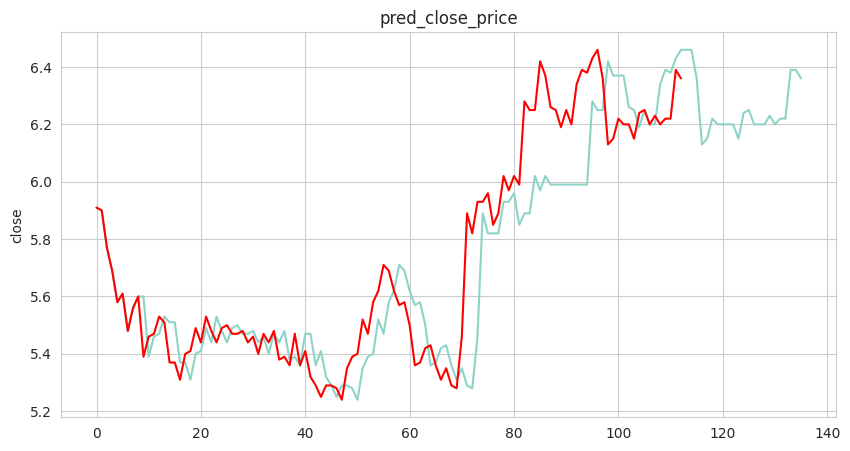

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_out['close'])
sns.lineplot(data=df_kline['close'],color='red')
# Adding title
plt.title('pred_close_price')

# Display the plot
plt.show()

In [26]:
merged_out

,date,hour,0,1,2,3,4,5,6,7,...,open,high,low,close,pre_close,change,pct_chg,vol,amount,idx
0,20231017,00,0.017436,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,...,5.86,5.92,5.82,5.91,5.86,0.05,0.8532,982429.17,577921.115,31.0
1,20231017,01,0.017436,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,...,5.86,5.92,5.82,5.91,5.86,0.05,0.8532,982429.17,577921.115,31.0
2,20231017,02,0.017436,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,...,5.86,5.92,5.82,5.91,5.86,0.05,0.8532,982429.17,577921.115,31.0
3,20231017,03,0.017436,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,...,5.86,5.92,5.82,5.91,5.86,0.05,0.8532,982429.17,577921.115,31.0
4,20231017,04,0.017436,-0.037303,-0.001553,0.023647,0.004944,0.062275,0.039161,0.083271,...,5.86,5.92,5.82,5.91,5.86,0.05,0.8532,982429.17,577921.115,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,20240401,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.39,6.40,6.29,6.36,6.39,-0.03,-0.4695,1265608.18,803452.484,31.0
3260,20240401,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.39,6.40,6.29,6.36,6.39,-0.03,-0.4695,1265608.18,803452.484,31.0
3261,20240401,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.39,6.40,6.29,6.36,6.39,-0.03,-0.4695,1265608.18,803452.484,31.0
3262,20240401,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.39,6.40,6.29,6.36,6.39,-0.03,-0.4695,1265608.18,803452.484,31.0
